In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [18]:
file = "https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv"



In [19]:
df = pd.read_csv(file)
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


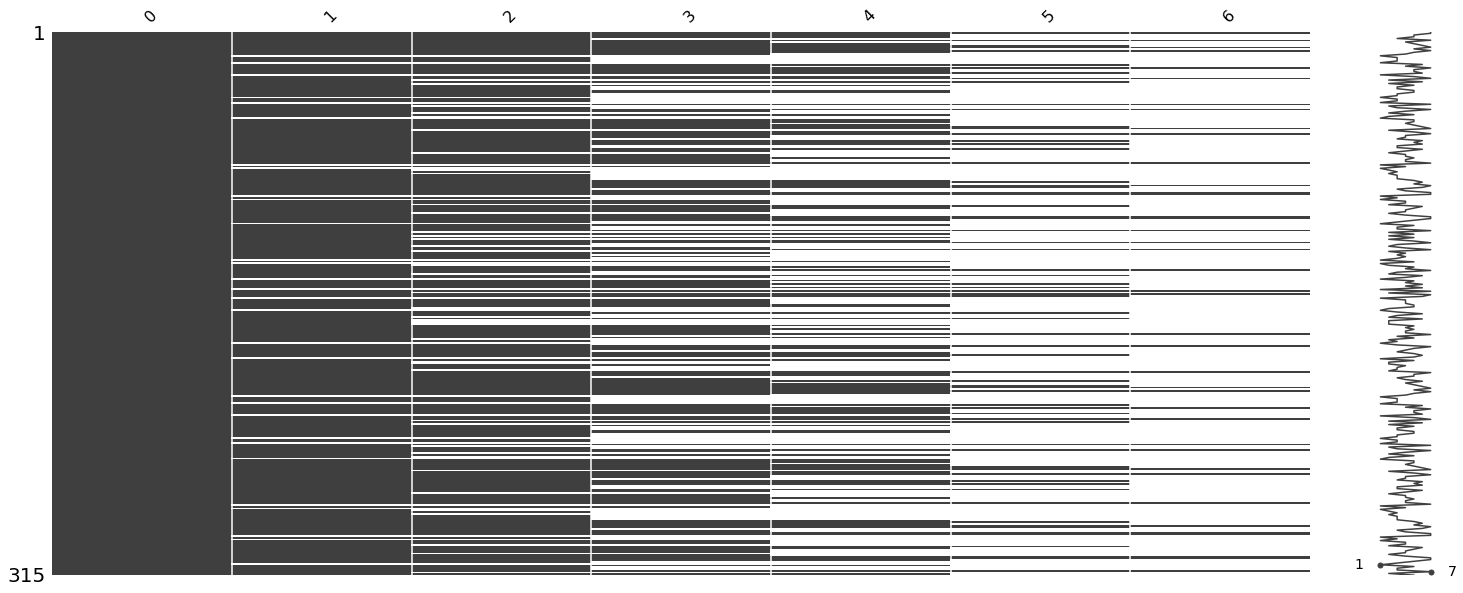

In [20]:
msno.matrix(df)

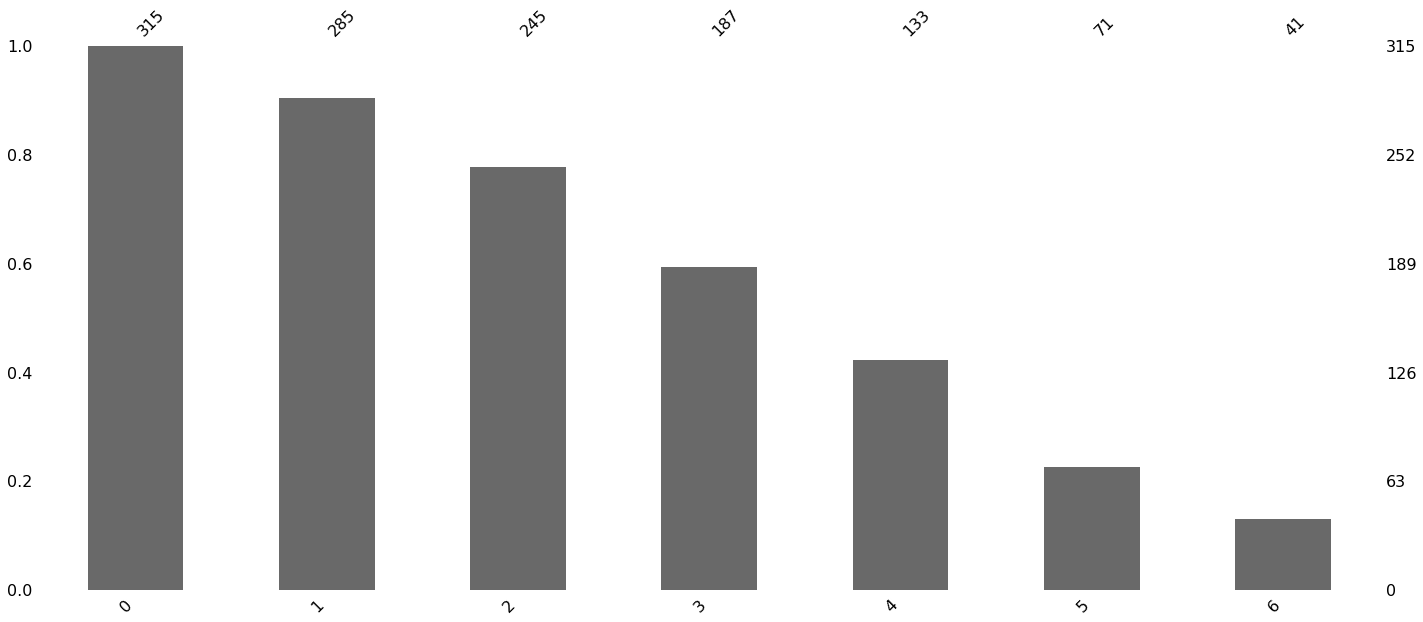

In [21]:
msno.bar(df)

In [22]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [23]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [24]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Bagel,Milk,Pencil,Diaper,Eggs,Meat,Bread,Cheese,Wine
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1
2,0,1,0,0,1,1,0,1,1
3,0,1,0,0,1,1,0,1,1
4,0,0,1,0,0,1,0,0,1


In [25]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 99 combinations | Sampling itemset size 3


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.361905,(Pencil)
3,0.406349,(Diaper)
4,0.438095,(Eggs)


In [26]:
freq_items.itemsets.unique()

array([frozenset({'Bagel'}), frozenset({'Milk'}), frozenset({'Pencil'}),
       frozenset({'Diaper'}), frozenset({'Eggs'}), frozenset({'Meat'}),
       frozenset({'Bread'}), frozenset({'Cheese'}), frozenset({'Wine'}),
       frozenset({'Bagel', 'Milk'}), frozenset({'Bagel', 'Bread'}),
       frozenset({'Eggs', 'Milk'}), frozenset({'Milk', 'Meat'}),
       frozenset({'Bread', 'Milk'}), frozenset({'Cheese', 'Milk'}),
       frozenset({'Milk', 'Wine'}), frozenset({'Bread', 'Pencil'}),
       frozenset({'Cheese', 'Pencil'}), frozenset({'Pencil', 'Wine'}),
       frozenset({'Bread', 'Diaper'}), frozenset({'Cheese', 'Diaper'}),
       frozenset({'Wine', 'Diaper'}), frozenset({'Eggs', 'Meat'}),
       frozenset({'Cheese', 'Eggs'}), frozenset({'Eggs', 'Wine'}),
       frozenset({'Bread', 'Meat'}), frozenset({'Cheese', 'Meat'}),
       frozenset({'Meat', 'Wine'}), frozenset({'Bread', 'Cheese'}),
       frozenset({'Bread', 'Wine'}), frozenset({'Cheese', 'Wine'}),
       frozenset({'Cheese', 'Mil

In [27]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
5,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
6,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
7,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
8,"(Milk, Cheese)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
9,"(Cheese, Meat)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
